In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

In [3]:
path ="Data_IDB/FT"
ext = "csv"
extention = r"{}".format(ext)
direction = Path(r"{}".format(path))
files_list = list(direction.glob(r"*.{}*".format(extention)))
csvs = []
for csv in files_list:
    csvs.append(str(csv))
csvs

['Data_IDB\\FT\\L7_2011.csv',
 'Data_IDB\\FT\\L7_2012.csv',
 'Data_IDB\\FT\\L7_2013.csv',
 'Data_IDB\\FT\\L7_2014.csv',
 'Data_IDB\\FT\\L7_2016.csv',
 'Data_IDB\\FT\\L8_2013.csv',
 'Data_IDB\\FT\\L8_2014.csv',
 'Data_IDB\\FT\\L8_2015.csv',
 'Data_IDB\\FT\\L8_2016.csv',
 'Data_IDB\\FT\\L8_2017.csv',
 'Data_IDB\\FT\\L8_2018.csv',
 'Data_IDB\\FT\\L8_2019.csv']

In [4]:
alldb = pd.DataFrame()
for csv in csvs:
    file = pd.read_csv(csv)
    alldb = pd.concat([alldb,file],ignore_index = True)
alldb

,ARVI,DNWVI,EVI,GNDVI,ID,IPVI,NDVI,NWVI,OSAVI,TGI,patca,date
0,0.369067,-0.440473,0.398555,0.490163,307911,0.737400,0.474799,-0.063412,0.357199,0.010830,1,2011-04-16
1,0.689451,-0.547210,0.559756,0.685644,307911,0.870005,0.740011,-0.223938,0.534539,0.017750,1,2011-11-10
2,0.781500,-0.524693,0.645622,0.724963,307911,0.905893,0.811786,-0.325548,0.596933,0.024283,1,2011-12-28
3,0.539850,-0.525394,0.434641,0.640253,379211,0.809823,0.619646,-0.188199,0.435611,0.003675,1,2011-02-11
4,0.535834,-0.518609,0.343954,0.604551,380711,0.802326,0.604652,-0.125035,0.385234,0.004336,0,2011-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...
78377,0.413088,-0.725533,0.323569,0.734152,391511,0.778437,0.556873,0.543561,0.372429,0.010827,0,2019-12-17
78378,0.524528,-0.605998,0.258821,0.641456,363121,0.789818,0.579637,0.541628,0.321882,0.007202,0,2019-12-17
78379,0.164338,-0.575865,0.255949,0.539237,369221,0.662859,0.325719,0.372041,0.247085,0.016602,0,2019-12-17
78380,0.763555,-0.698624,0.447568,0.834602,94911,0.899159,0.798318,0.638867,0.508104,0.011029,0,2019-12-17


In [5]:
melt_db = alldb.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )
melt_db['date'] = pd.to_datetime(melt_db['date'], format='%Y-%m-%d')
ID = np.unique(melt_db.ID)
df1 = melt_db[melt_db.ID==ID[300]]

# print(df1.date.iloc[0][0:4])
print(str(df1.ID.iloc[0]))
df1.head()


386511


,date,ID,variable,value
2583,2011-01-01,386511,NDVI,0.564372
2807,2011-01-17,386511,NDVI,0.562944
3073,2011-02-02,386511,NDVI,0.517808
3421,2011-03-06,386511,NDVI,0.367900
3689,2011-03-22,386511,NDVI,0.315355


In [6]:
# sns.set_style("white")
rc={"font.weight":"bold",'figure.figsize':(30, 6),'axes.labelsize': 28, 
    'font.size': 28,'axes.titlesize': 28,'legend.fontsize': 18, 'axes.titlesize': 28,
   "lines.linewidth": 2.5,'font.sans-serif': "Times New Roman"}
# sns.set()
sns.set(style="white", rc=rc,font_scale = 1.8)

DATE = pd.DataFrame({
    'inside':['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01']
})

DATE['inside'] = pd.to_datetime(DATE['inside'], format='%Y-%m-%d')
# DATE
# sns.set_style("white")
# sns.set_context("paper",rc=rc,font_scale = 1.5)

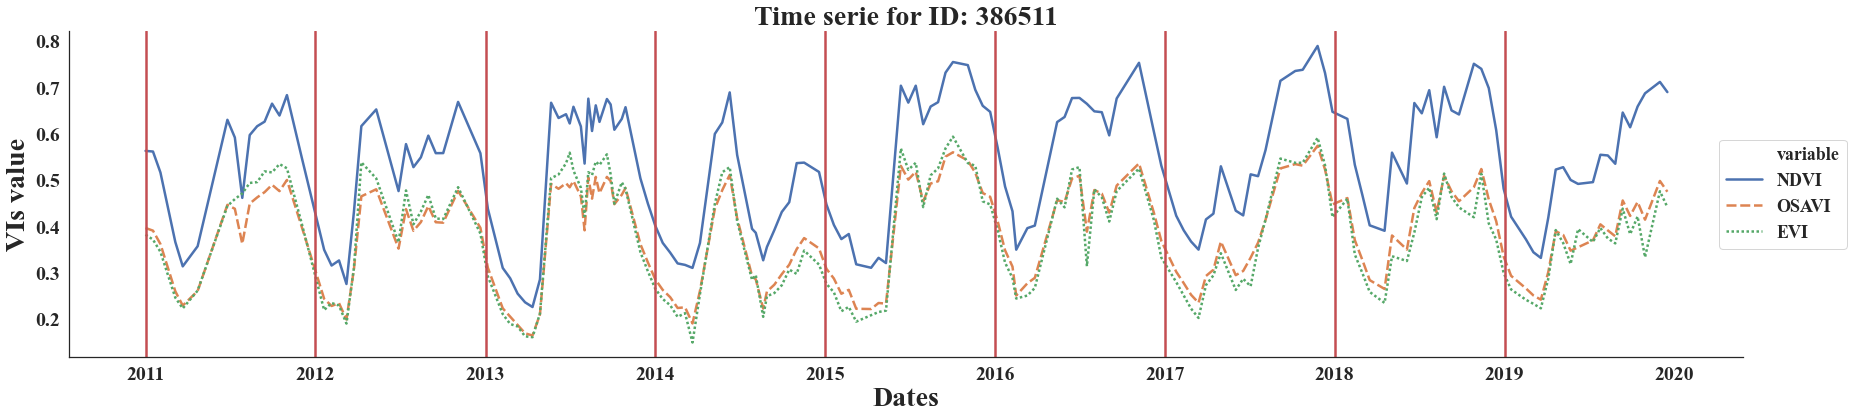

In [7]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=df1)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

In [22]:
years = np.unique(df1['date'].dt.year)
for year in years:
    df = df1[df1['date'].dt.year == year]
    p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=df)
    p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
    # p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')

    handles, labels = p.get_legend_handles_labels()
    lgd = dict(zip(labels, handles))
    p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
    sns.despine()
    # for inside  in DATE.inside:
    #     p.axvline(inside,color='r',label="start year")
    # # p.xticks(rotation=45)
    # p.tick_params(axis='x', labelrotation=90)
    figure = p.get_figure()
    figure.savefig('Data_IDB/trends/TS_'+str(year)+'-386511.png', dpi=600)
    plt.close(figure)

In [ ]:
with PdfPages('kde.pdf') as pdf_pages:
    for i in range(1, 114):
        for j in range(0, 113):
            x=t1.iloc[:, i]
            y=t1.iloc[:, j]
            joint_grid = sns.jointplot(x=x, y=y, kind="kde", dropna=True)
            pdf_pages.savefig(joint_grid.fig)